Problem Statement:

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant)

Length / continuous / mm / Longest shell measurement

Diameter / continuous / mm / perpendicular to length

Height / continuous / mm / with meat in shell

Whole weight / continuous / grams / whole abalone

Shucked weight / continuous / grams / weight of meat

Viscera weight / continuous / grams / gut weight (after bleeding)

Shell weight / continuous / grams / after being dried

Rings / integer / -- / +1.5 gives the age in years. 

You have to predict the rings of each abalone which will lead us to the age of that abalone. 

# 1.Import Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2.Getting Dataset

In [3]:
data=pd.read_csv("abalone.csv")

In [4]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
data.shape

(4177, 9)

**Abalone dataset having total row/observation 4177 and 9 columns.**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


1. No null value
2. sex columns having categorical data
3. 7 columns are float
4. our target variable is int

In [7]:
data.describe(include="all")

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,NaN,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,NaN,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,NaN,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,NaN,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000


The following observation:
    1. No null value
    2. Height featurs have minimum value is 0
    3. None of feature are normal distribution becuase there is marginal difference between mean and median.
    4. All columns are numerical except sex.
    5. Features having different scale so we might need to do scaling of all features.
    6. Sex features having 3 unique category

# 2.1 Checking Null Value

In [8]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

**There are no null values in our dataset**

# 2.2 Checking Duplicate value

In [9]:
data.duplicated().sum()

0

**There are no dublicate rows in our data set**

# 3.Univariate analysis

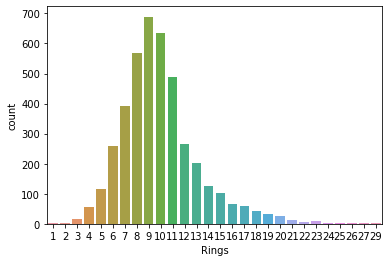

In [10]:
sns.countplot(data["Rings"])

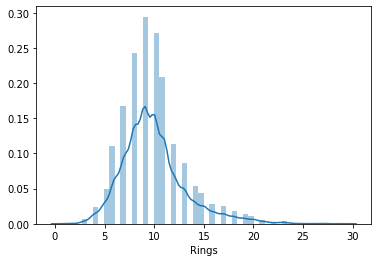

In [11]:
sns.distplot(data["Rings"])

**Our target variable i.e Rings are almost normal distribution pattern.**

In [12]:
print("\nSex count in number")
print(data["Sex"].value_counts())
print("\n***************************************")
print('\nSex count in percentage')
print(data["Sex"].value_counts(normalize=True))


Sex count in number
M    1528
I    1342
F    1307
Name: Sex, dtype: int64

***************************************

Sex count in percentage
M    0.365813
I    0.321283
F    0.312904
Name: Sex, dtype: float64


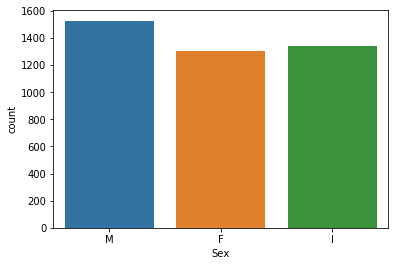

In [13]:
sns.countplot(data["Sex"])

We can see in sex variable there are three class, Male,Female and Infant. 

Male-1528

Female-1307 

Infant-1342

# 4.Dealing with zero value in height features

In [14]:
#We have seen height columns has 0 values so will try to figure it out.

In [15]:
(data.Height==0).sum()

2

**There are 2 row where height features having "zero" value**

In [16]:
data[data["Height"]==0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
1257,I,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,I,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


**As we can see both 0 height value sex is infant, so we will fill this with the mean of infants height**

In [17]:
mean=pd.pivot_table(data,index=["Sex"],aggfunc={"Height":np.mean})

In [18]:
mean

,Height
Sex,
F,0.158011
I,0.107996
M,0.151381


In [19]:
data["Height"]=data["Height"].replace(to_replace=0,value=mean["Height"][1])

In [20]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139568,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041721,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


**As we can see there are no more zero (0) min value in height features,it has been filled with Infant sex mean value in height columns**

# 5. Dealing Categorical features with Label Encoder

In [21]:
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
lab_enc=LabelEncoder()

In [24]:
data2=lab_enc.fit_transform(data["Sex"])
pd.Series(data2)

0       2
1       2
2       0
3       2
4       1
       ..
4172    0
4173    2
4174    2
4175    0
4176    2
Length: 4177, dtype: int32

In [25]:
data["Sex"]=data2

In [26]:
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


**After Encoding our Sex featuers values has been converted to numberical, where Female is 0,Infant is 1 and Male is 2.**

# 6. Bivariate Analysis

Text(0.5, 1.0, 'Lenght Vs Rings')

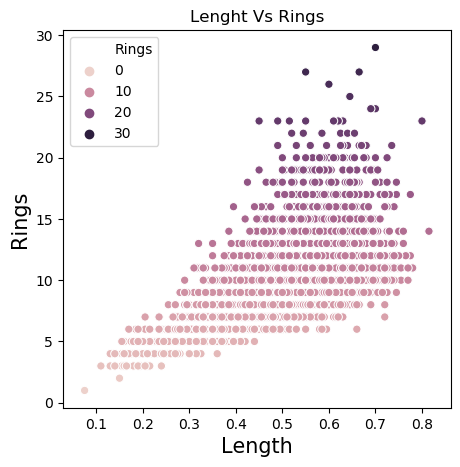

In [27]:
plt.figure(figsize=(5,5),dpi=100)
sns.scatterplot(x="Length",y="Rings",data=data,hue="Rings")
plt.xlabel("Length",fontsize=15)
plt.ylabel("Rings",fontsize=15)
plt.title("Lenght Vs Rings")

**We can interprete that Rings size and lenght are corelated and having regression in nature.**

Text(0.5, 1.0, 'Height Vs Rings')

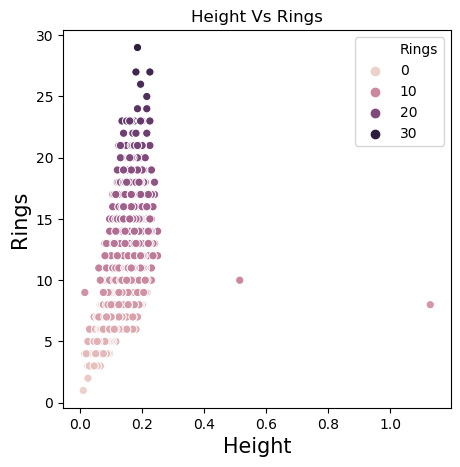

In [28]:
plt.figure(figsize=(5,5),dpi=100)
sns.scatterplot(x="Height",y="Rings",data=data,hue="Rings")
plt.xlabel("Height",fontsize=15)
plt.ylabel("Rings",fontsize=15)
plt.title("Height Vs Rings")

**We can interprete that Rings size and lenght are not corelated.**

Text(0.5, 1.0, 'Diameter Vs Rings')

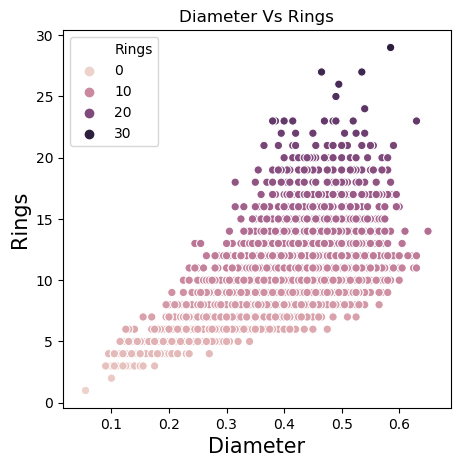

In [29]:
plt.figure(figsize=(5,5),dpi=100)
sns.scatterplot(x="Diameter",y="Rings",data=data,hue="Rings")
plt.xlabel("Diameter",fontsize=15)
plt.ylabel("Rings",fontsize=15)
plt.title("Diameter Vs Rings")

**We can interprete that Rings size and Diameter are corelated and having regression in nature.**

Text(0.5, 1.0, 'Whole weight Vs Rings')

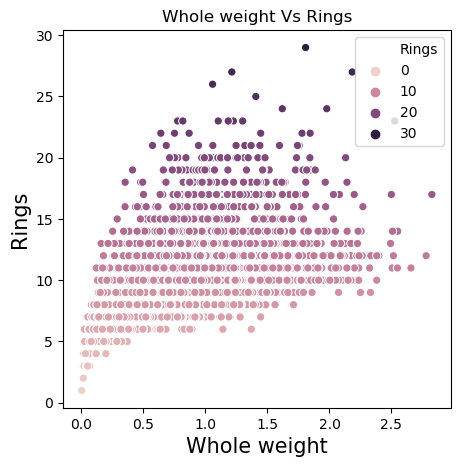

In [30]:
plt.figure(figsize=(5,5),dpi=100)
sns.scatterplot(x="Whole weight",y="Rings",data=data,hue="Rings")
plt.xlabel("Whole weight",fontsize=15)
plt.ylabel("Rings",fontsize=15)
plt.title("Whole weight Vs Rings")

**We can interprete that Rings size and whole wieght are corelated and having regression in nature.**

Text(0.5, 1.0, 'Shucked weight Vs Rings')

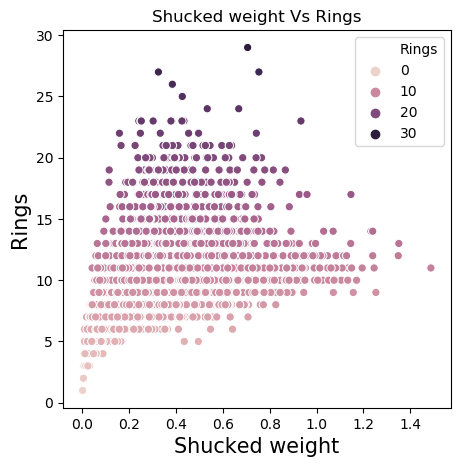

In [31]:
plt.figure(figsize=(5,5),dpi=100)
sns.scatterplot(x="Shucked weight",y="Rings",data=data,hue="Rings")
plt.xlabel("Shucked weight",fontsize=15)
plt.ylabel("Rings",fontsize=15)
plt.title("Shucked weight Vs Rings")

Text(0.5, 1.0, 'Viscera weight Vs Rings')

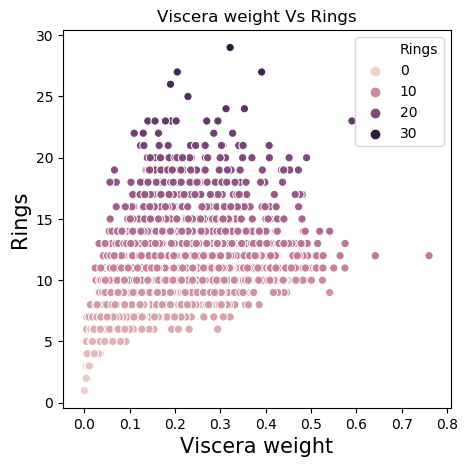

In [32]:
plt.figure(figsize=(5,5),dpi=100)
sns.scatterplot(x="Viscera weight",y="Rings",data=data,hue="Rings")
plt.xlabel("Viscera weight",fontsize=15)
plt.ylabel("Rings",fontsize=15)
plt.title("Viscera weight Vs Rings")

Text(0.5, 1.0, 'Shell weight Vs Rings')

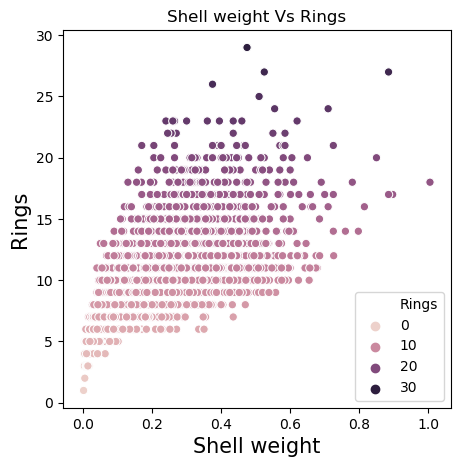

In [33]:
plt.figure(figsize=(5,5),dpi=100)
sns.scatterplot(x="Shell weight",y="Rings",data=data,hue="Rings")
plt.xlabel("Shell weight",fontsize=15)
plt.ylabel("Rings",fontsize=15)
plt.title("Shell weight Vs Rings")

Text(0.5, 1.0, 'Sex Vs Rings')

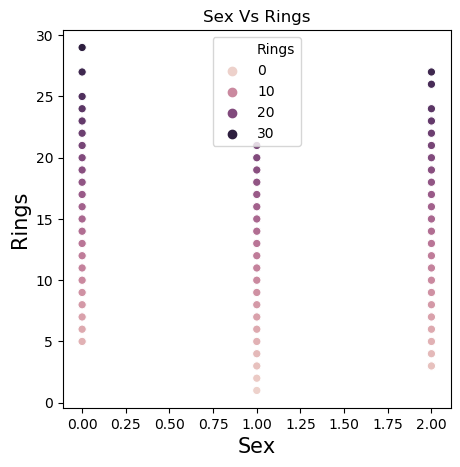

In [34]:
plt.figure(figsize=(5,5),dpi=100)
sns.scatterplot(x="Sex",y="Rings",data=data,hue="Rings")
plt.xlabel("Sex",fontsize=15)
plt.ylabel("Rings",fontsize=15)
plt.title("Sex Vs Rings")

# 7. Multivariate Analysis

In [35]:
data.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042264,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.828091,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.834265,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042264,0.828091,0.834265,1.000000,0.819916,0.775670,0.798951,0.819359,0.557755
Whole weight,-0.021391,0.925261,0.925452,0.819916,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.775670,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798951,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.819359,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557755,0.540390,0.420884,0.503819,0.627574,1.000000


In [36]:
data.corr()["Rings"].sort_values(ascending=False)

Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557755
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Sex              -0.034627
Name: Rings, dtype: float64

**We can see sex features are not correlated with any features**

In [37]:
plt.figure(figsize=(30,30),dpi=350)
sns.set(font_scale=2.5)
sns.heatmap(data.corr(),annot=True)

**As we can see Length,Diamter are highlty correlated and also Whote weight is highly correlated with Shucked,Viscera and shell weight.**

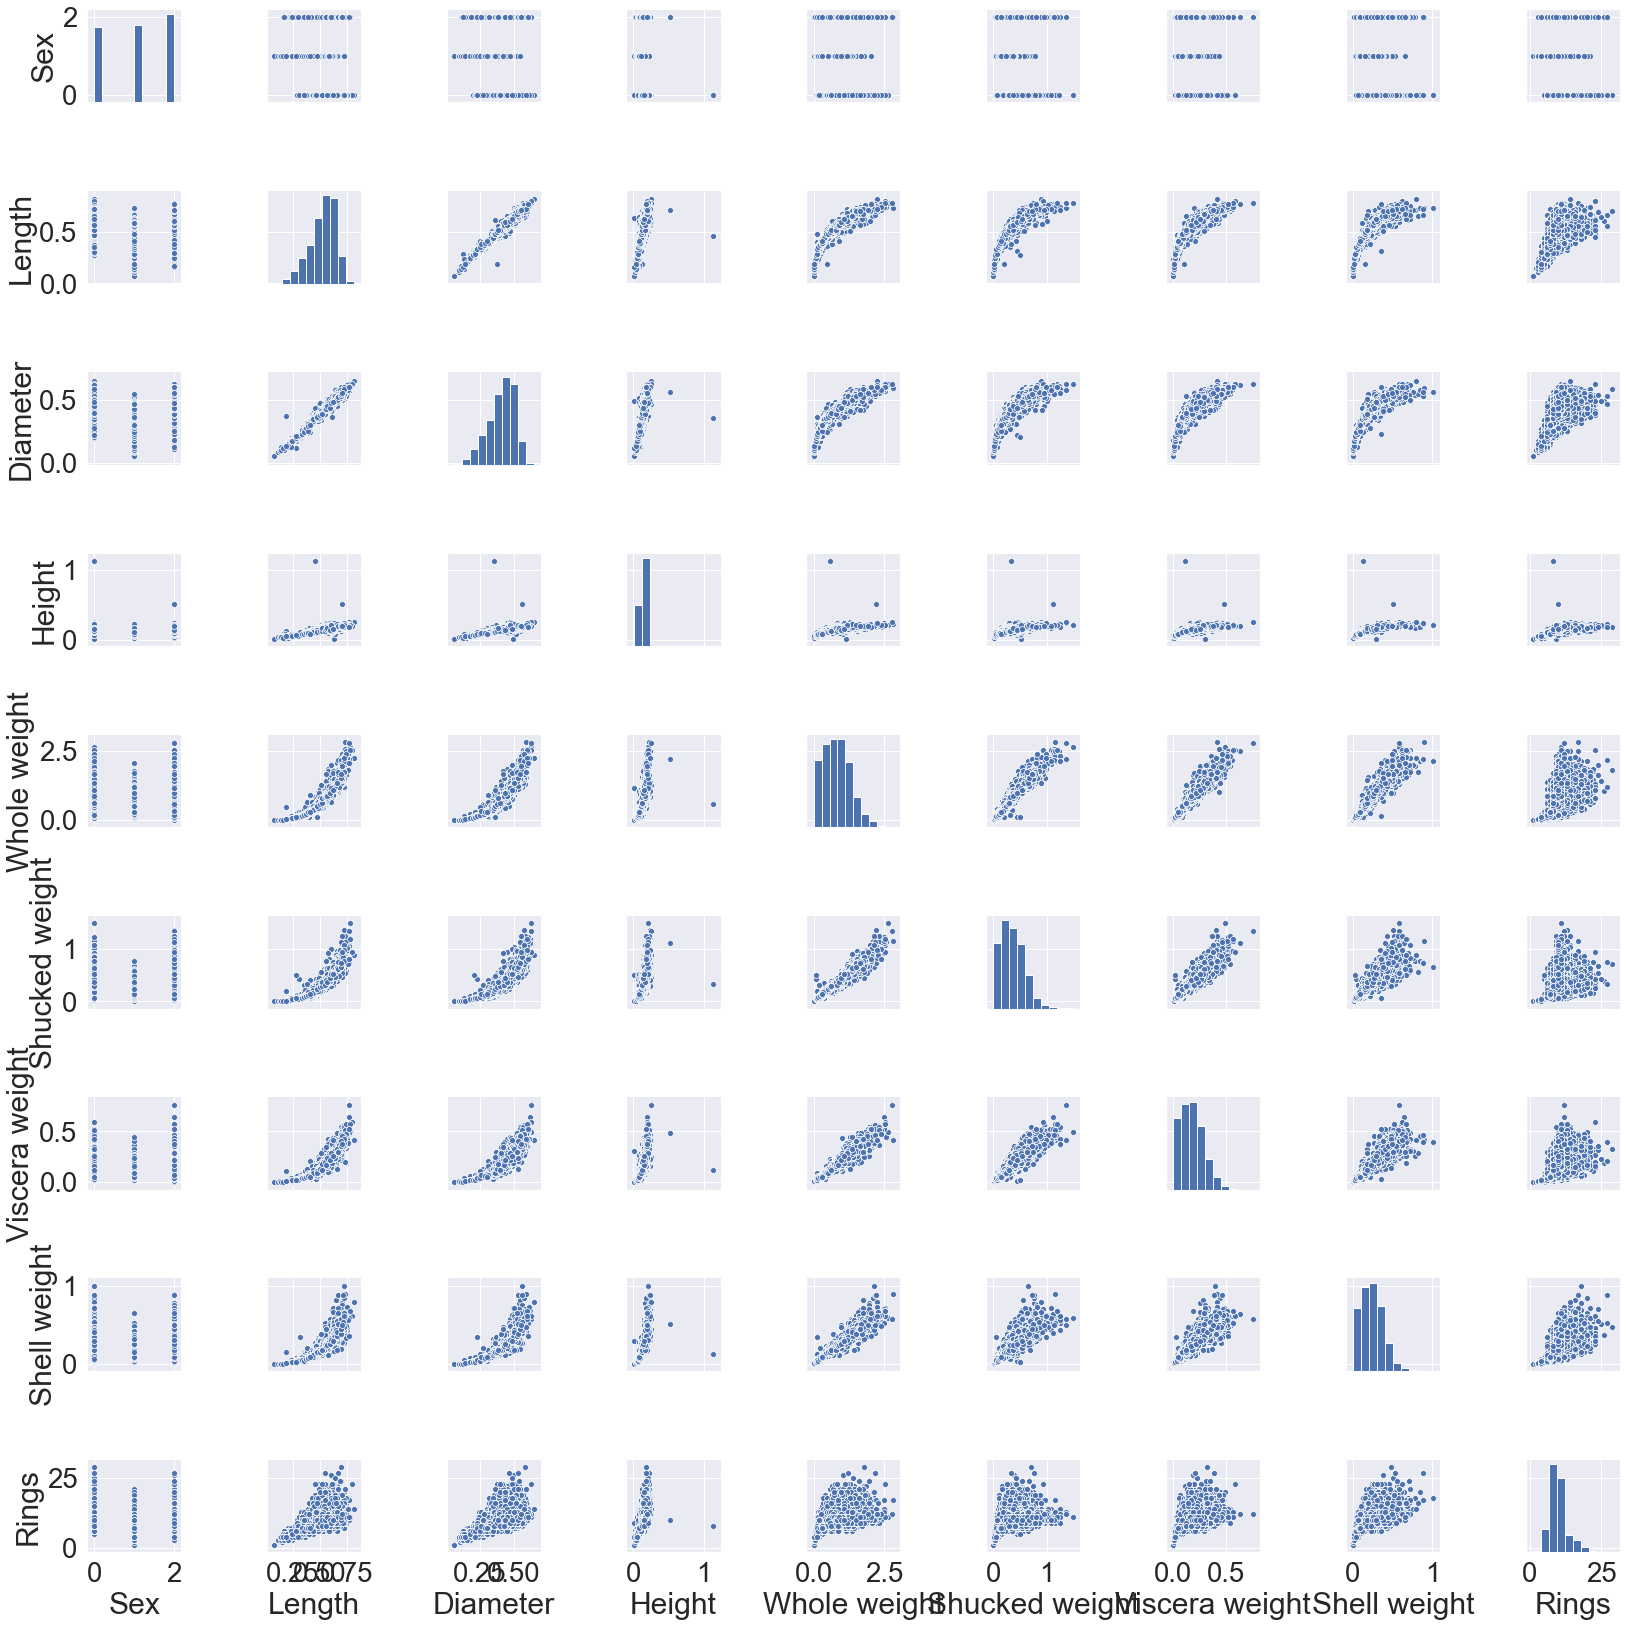

In [38]:
sns.pairplot(data)

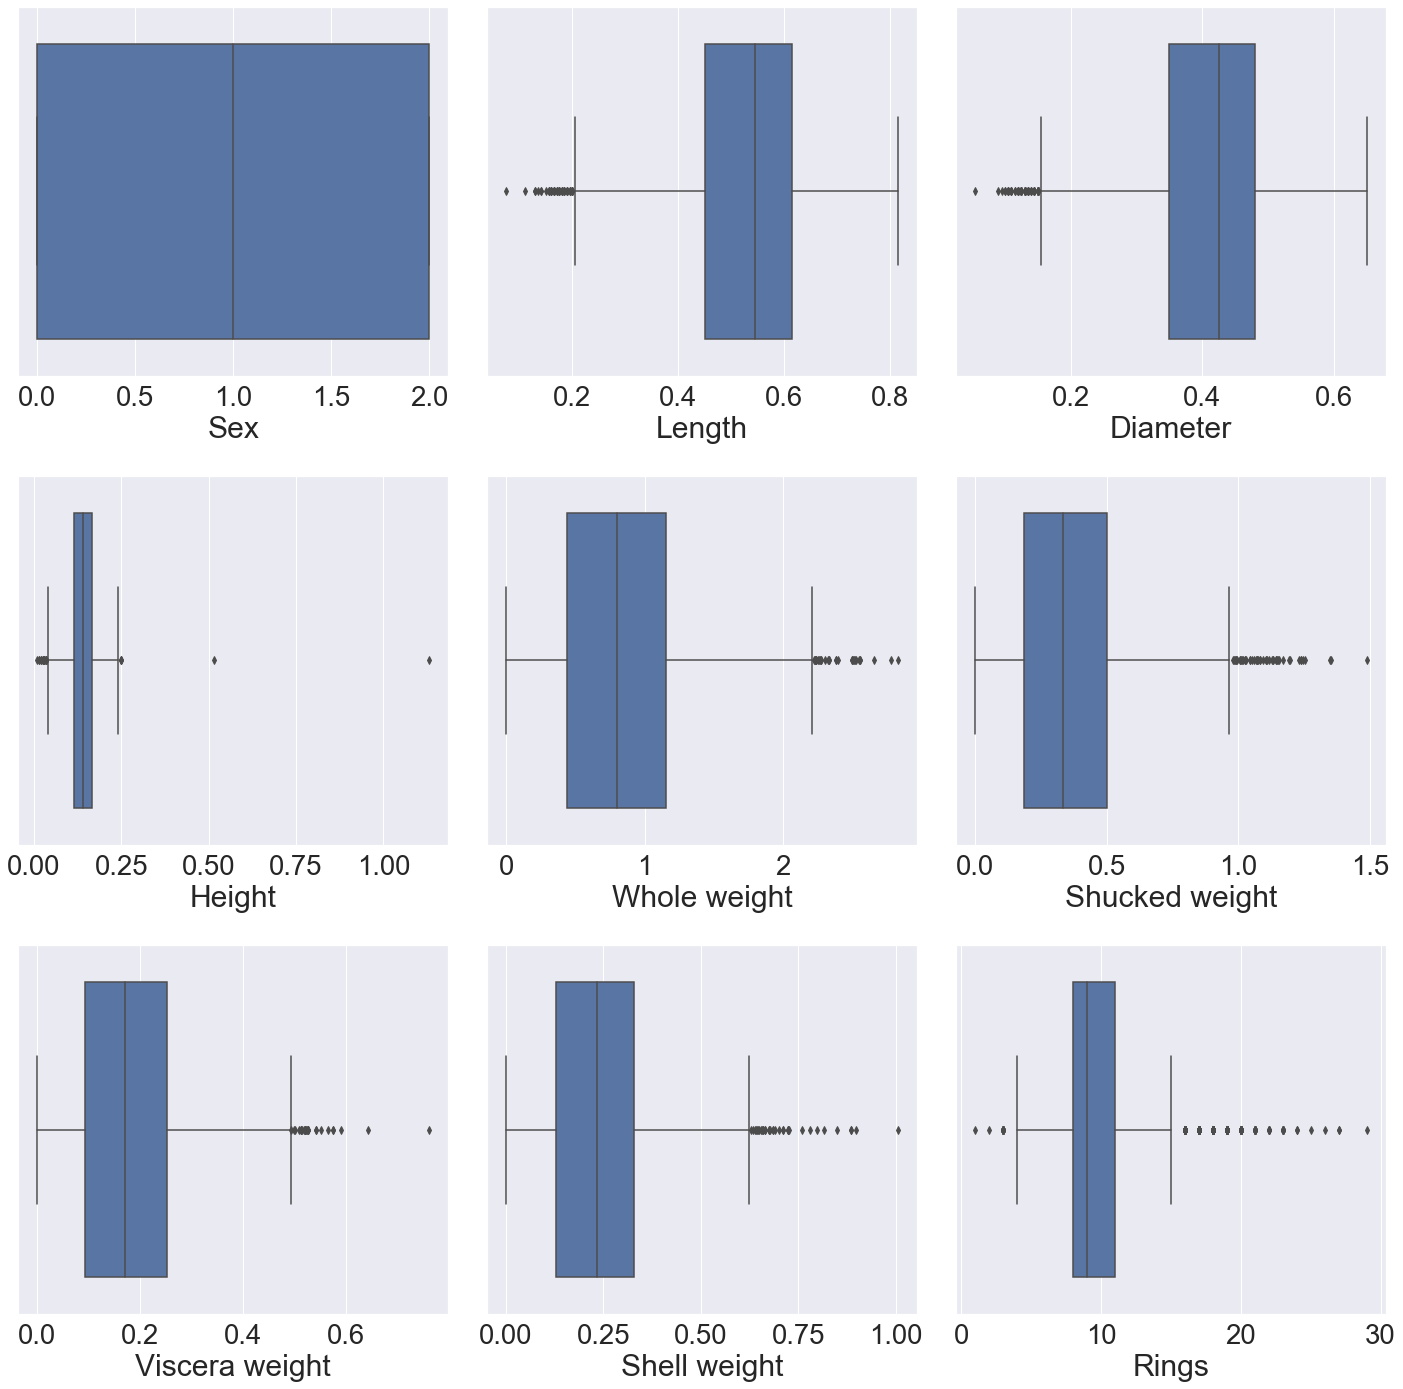

In [39]:
plt.figure(figsize=(20,20),facecolor="white")
plotnumber=1
for column in data:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column])
    plotnumber+=1
plt.tight_layout()

**we can see in boxplot almost all features having some outliers issue.**

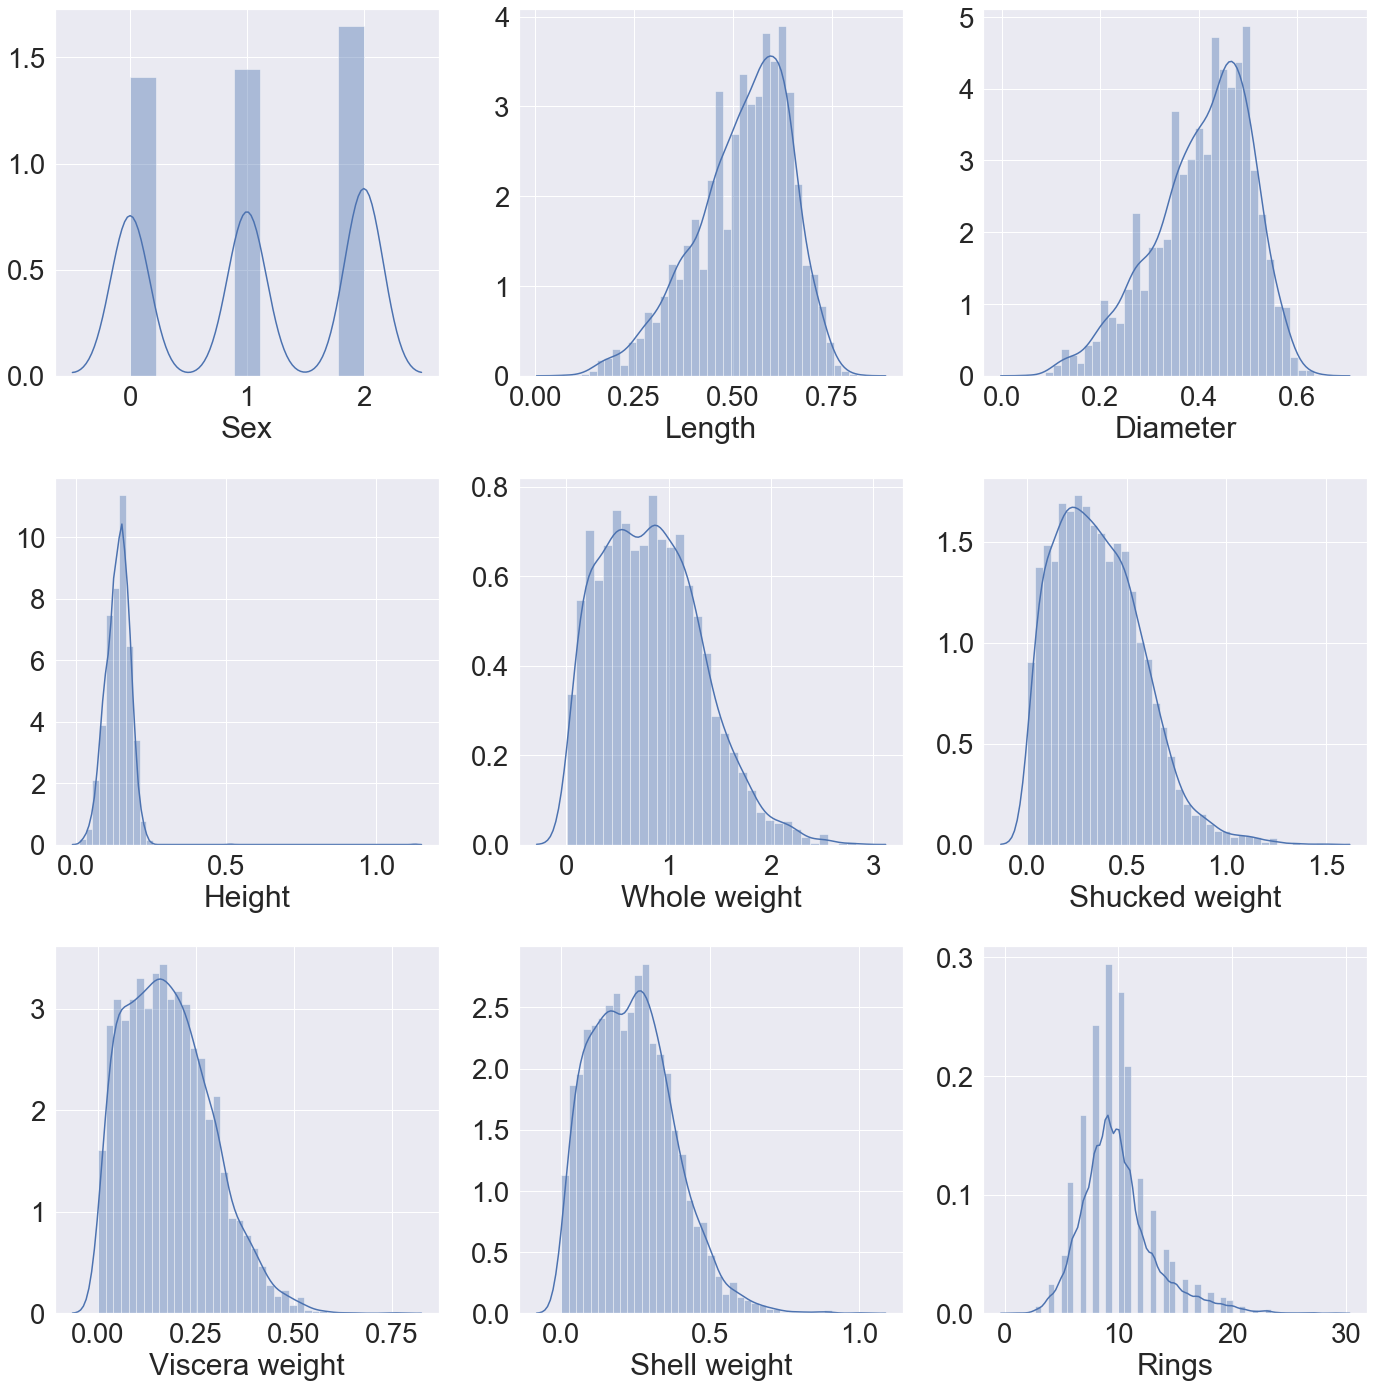

In [40]:
plt.figure(figsize=(20,20),facecolor="white")
plotnumber=1
for column in data:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
    plotnumber+=1
plt.tight_layout()

**The following observation**

1. Lenght features has left skeweed data
2. Diameter features has left skeweed data
3. Height having very high right skeweed data
4. whole weight having right skeweed data
5. Shucked weight having right skeweed data
6. Viscera and shell weight also having right skeweed data.

In [41]:
data.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.166698
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

** As we can see the each features range out of -0.5 to +0.5 data is not normalized .**

# 8. Dealing with Outliers

## Length

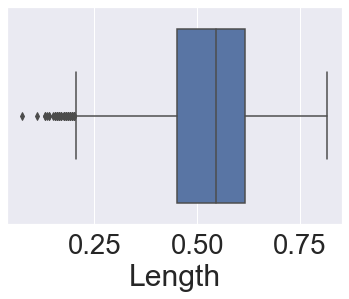

In [42]:
sns.boxplot(data["Length"])

In [43]:
upper_limit = data["Length"].mean() + 3*data["Length"].std()
lower_limit = data["Length"].mean() - 3*data["Length"].std()

In [44]:
data['Length'] = np.where(
    data['Length']>upper_limit,
    upper_limit,
    np.where(
        data['Length']<lower_limit,
        lower_limit,
        data['Length']
    )
)

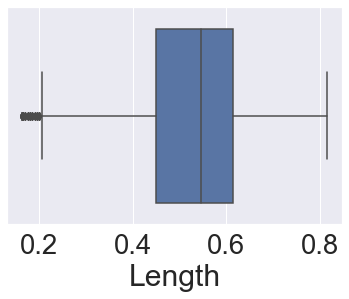

In [45]:
sns.boxplot(data["Length"])

## Diameter

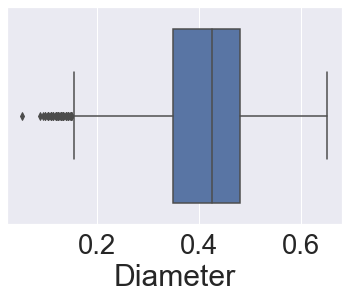

In [46]:
sns.boxplot(data["Diameter"])

In [47]:
print("Highest allowed",data['Diameter'].mean() + 3*data['Diameter'].std())
print("Lowest allowed",data['Diameter'].mean() - 3*data['Diameter'].std())

Highest allowed 0.7056008528898465
Lowest allowed 0.11016165608789152


In [48]:
data[(data['Diameter'] > 0.70) | (data['Diameter'] < 0.11)]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
236,1,0.163713,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1
237,1,0.163713,0.100,0.030,0.0130,0.0045,0.0030,0.0040,3
238,1,0.163713,0.090,0.030,0.0080,0.0025,0.0020,0.0030,3
696,1,0.163713,0.105,0.050,0.0175,0.0050,0.0035,0.0050,4
719,1,0.163713,0.100,0.025,0.0150,0.0045,0.0040,0.0050,2
1429,1,0.163713,0.105,0.035,0.0140,0.0055,0.0025,0.0040,3
2114,1,0.163713,0.095,0.035,0.0105,0.0050,0.0065,0.0035,4
3837,1,0.170000,0.105,0.035,0.0340,0.0120,0.0085,0.0050,4
3899,1,0.163713,0.105,0.035,0.0145,0.0050,0.0035,0.0050,4


In [49]:
new_data = data[(data['Diameter'] < 0.70) & (data['Diameter'] > 0.11)]

In [50]:
upper_limit = data["Diameter"].mean() + 3*data["Diameter"].std()
lower_limit = data["Diameter"].mean() - 3*data["Diameter"].std()

In [51]:
data['Diameter'] = np.where(
    data['Diameter']>upper_limit,
    upper_limit,
    np.where(
        data['Diameter']<lower_limit,
        lower_limit,
        data['Diameter']
    )
)

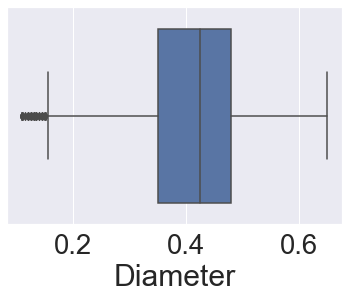

In [52]:
sns.boxplot(data["Diameter"])

## Height

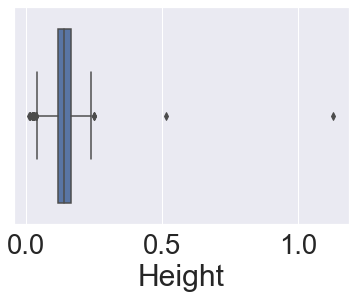

In [53]:
sns.boxplot(data["Height"])

In [54]:
upper_limit = data["Height"].mean() + 3*data["Height"].std()
lower_limit = data["Height"].mean() - 3*data["Height"].std()

In [55]:
data['Height'] = np.where(
    data['Height']>upper_limit,
    upper_limit,
    np.where(
        data['Height']<lower_limit,
        lower_limit,
        data['Height']
    )
)

## Whole weight

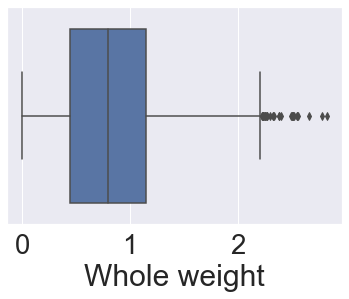

In [56]:
sns.boxplot(data["Whole weight"])

In [57]:
upper_limit = data["Whole weight"].mean() + 3*data["Whole weight"].std()
lower_limit = data["Whole weight"].mean() - 3*data["Whole weight"].std()

data['Whole weight'] = np.where(
    data['Whole weight']>upper_limit,
    upper_limit,
    np.where(
        data['Whole weight']<lower_limit,
        lower_limit,
        data['Whole weight']
    )
)


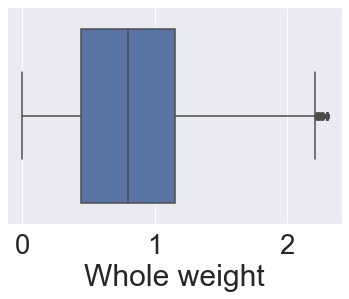

In [58]:
sns.boxplot(data["Whole weight"])

## Shucked weight

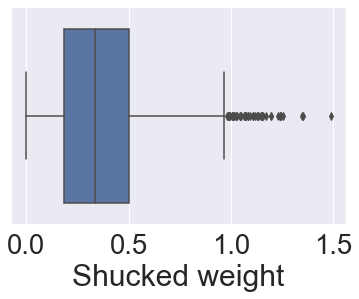

In [59]:
sns.boxplot(data["Shucked weight"])

In [60]:
upper_limit = data["Shucked weight"].mean() + 3*data["Shucked weight"].std()
lower_limit = data["Shucked weight"].mean() - 3*data["Shucked weight"].std()

data['Shucked weight'] = np.where(
    data['Shucked weight']>upper_limit,
    upper_limit,
    np.where(
        data['Shucked weight']<lower_limit,
        lower_limit,
        data['Shucked weight']
    )
)


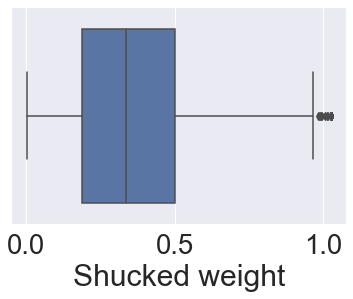

In [61]:
sns.boxplot(data["Shucked weight"])

## Viscera weight

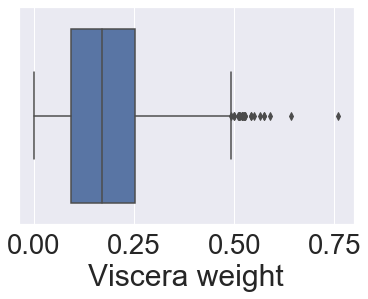

In [62]:
sns.boxplot(data["Viscera weight"])

In [63]:
upper_limit = data["Viscera weight"].mean() + 3*data["Viscera weight"].std()
lower_limit = data["Viscera weight"].mean() - 3*data["Viscera weight"].std()

data['Viscera weight'] = np.where(
    data['Viscera weight']>upper_limit,
    upper_limit,
    np.where(
        data['Viscera weight']<lower_limit,
        lower_limit,
        data['Viscera weight']
    )
)


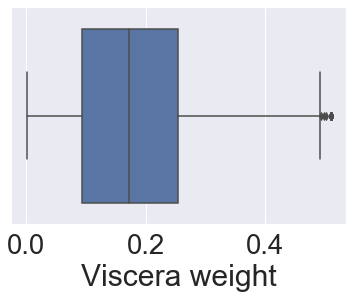

In [64]:
sns.boxplot(data["Viscera weight"])

## Shell weight

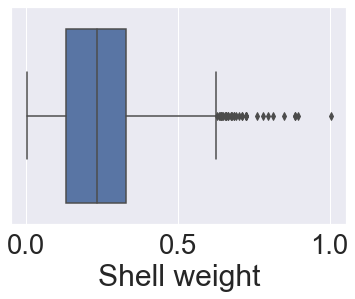

In [65]:
sns.boxplot(data["Shell weight"])

In [66]:
upper_limit = data["Shell weight"].mean() + 3*data["Shell weight"].std()
lower_limit = data["Shell weight"].mean() - 3*data["Shell weight"].std()

data['Shell weight'] = np.where(
    data['Shell weight']>upper_limit,
    upper_limit,
    np.where(
        data['Shell weight']<lower_limit,
        lower_limit,
        data['Shell weight']
    )
)


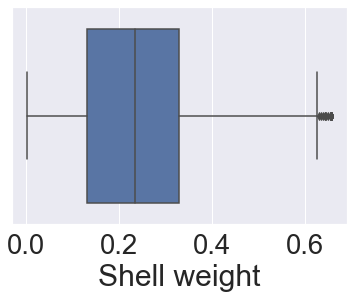

In [67]:
sns.boxplot(data["Shell weight"])

## Checking outliers after dealing

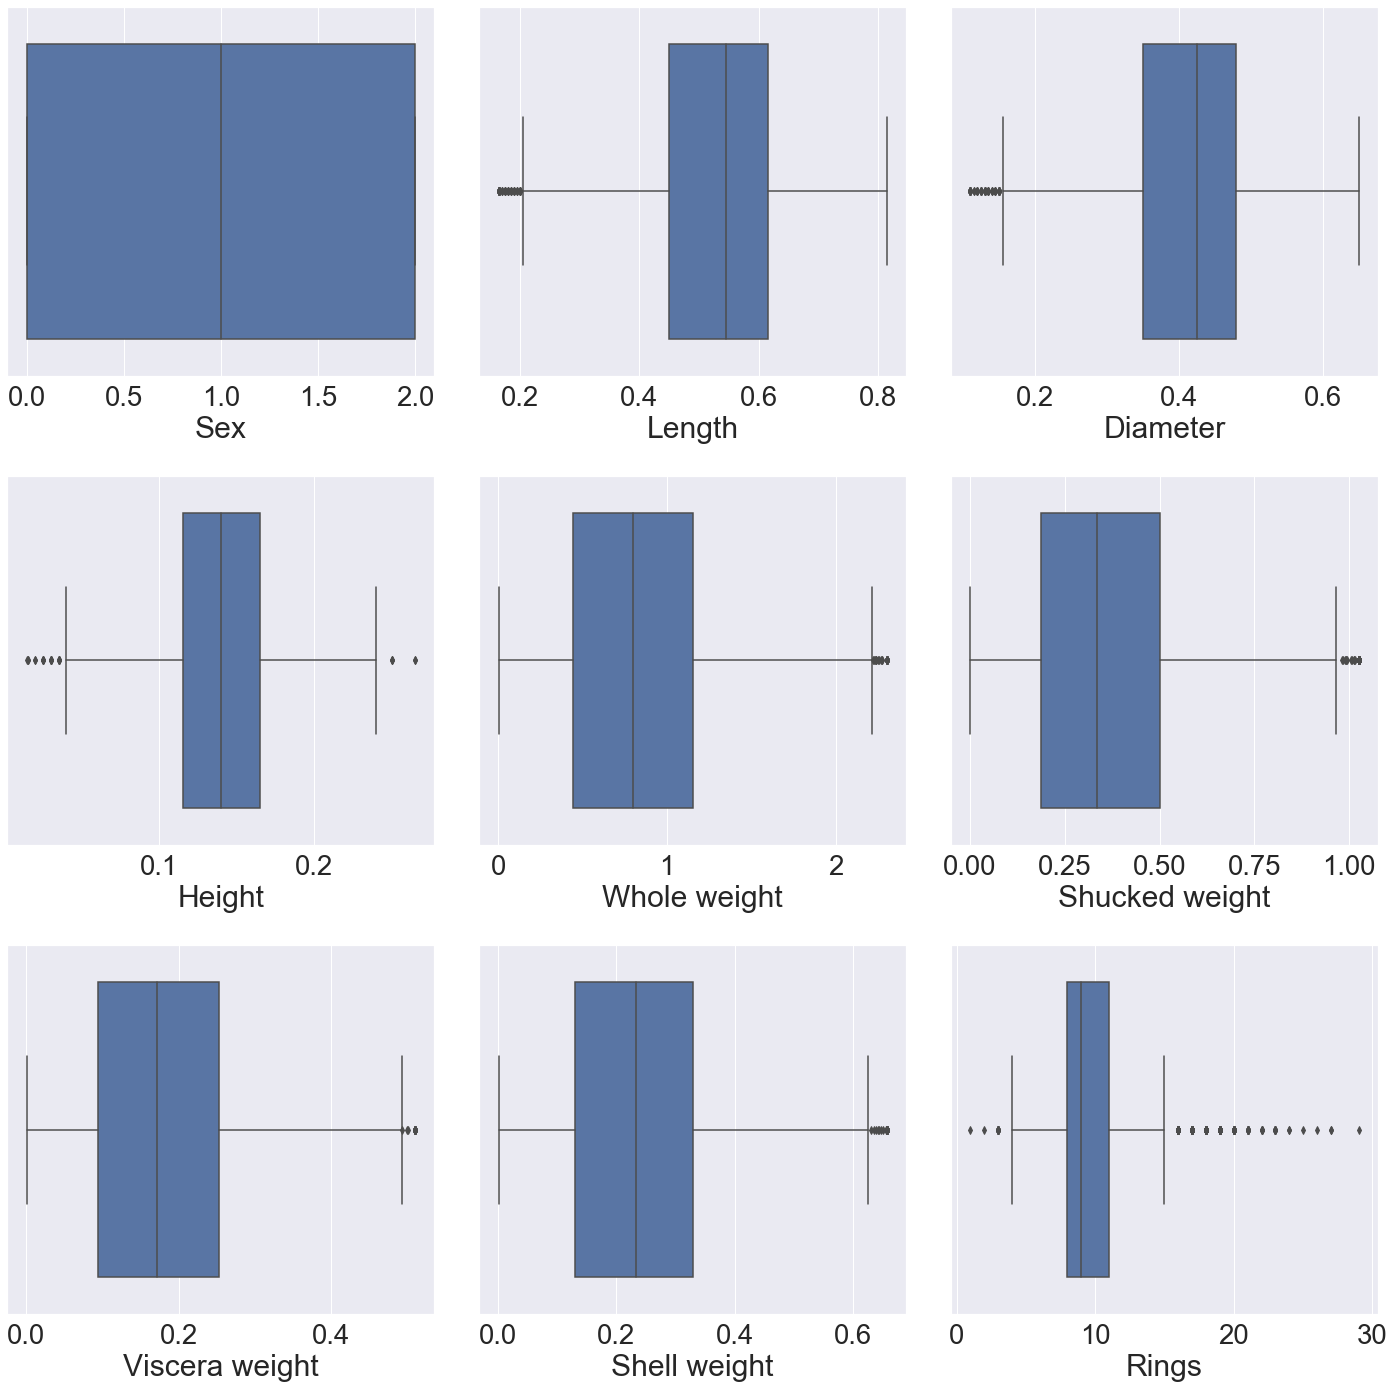

In [68]:
plt.figure(figsize=(20,20),facecolor="white")
plotnumber=1
for column in data:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column])
    plotnumber+=1
plt.tight_layout()

## Checking Skewness after dealing

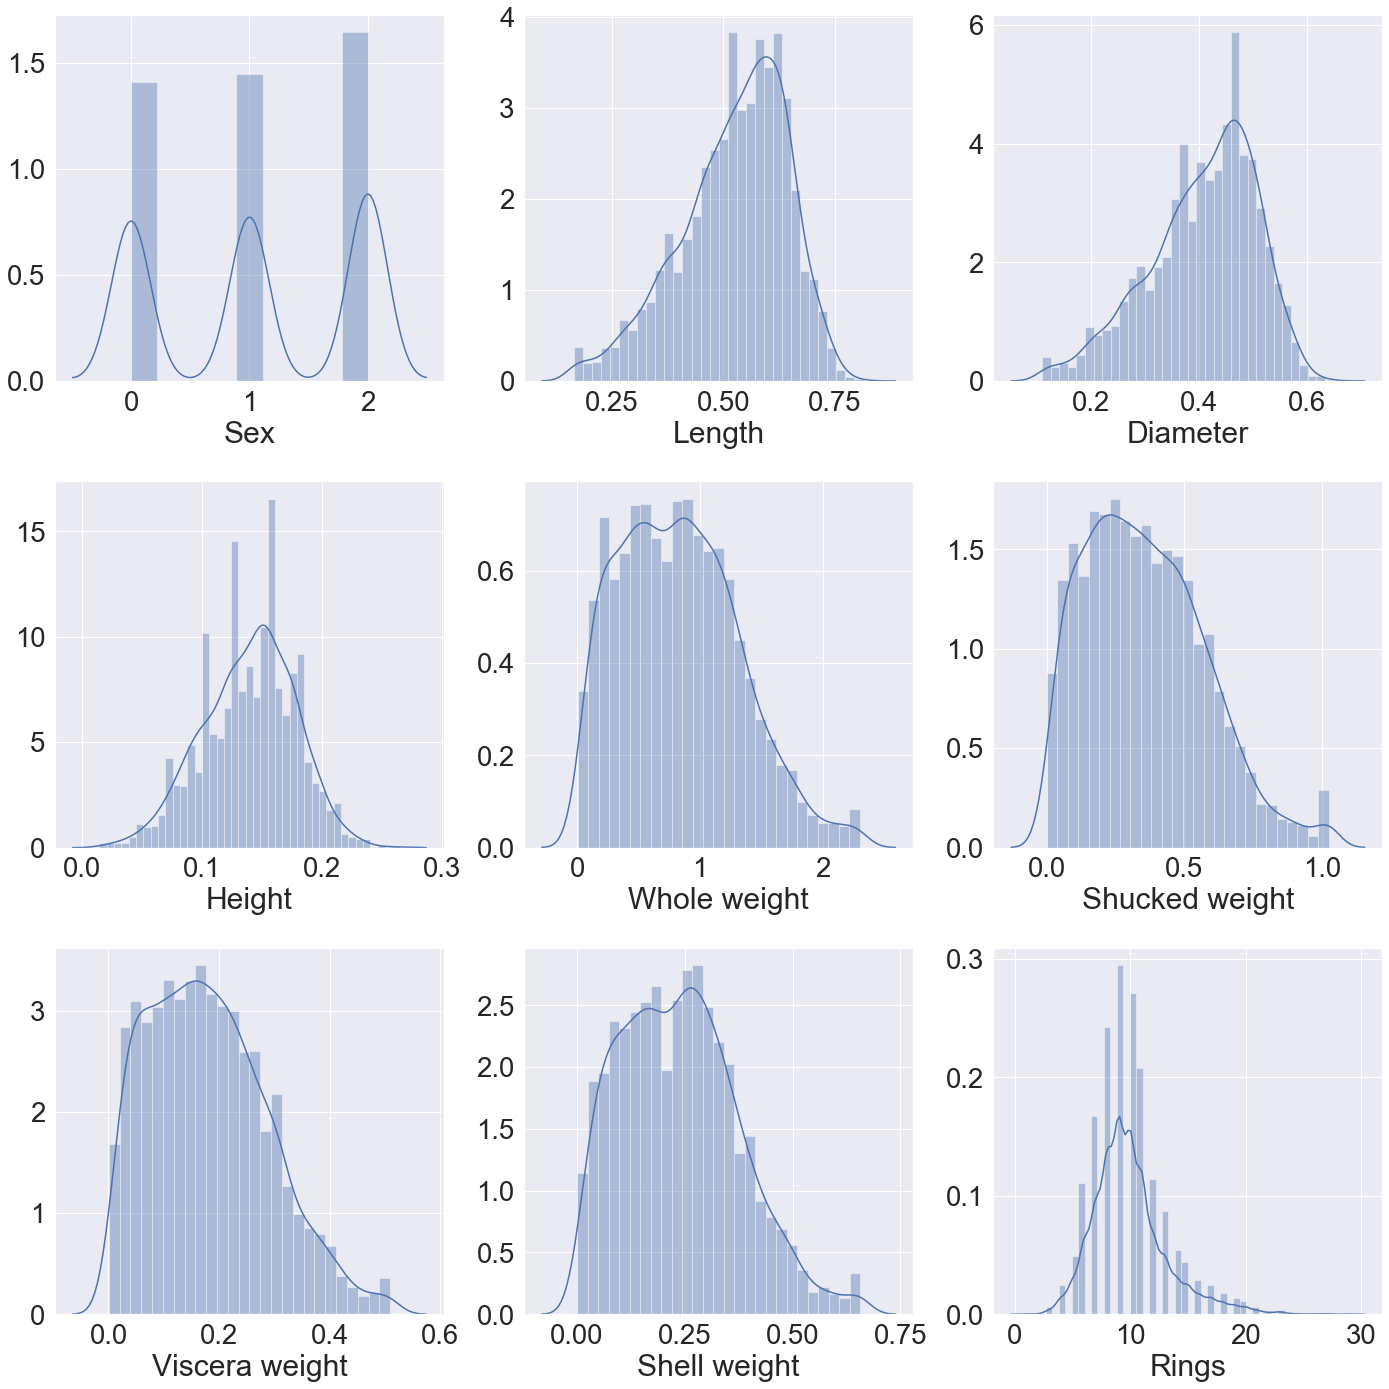

In [69]:
plt.figure(figsize=(20,20),facecolor="white")
plotnumber=1
for column in data:
    if plotnumber <=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
    plotnumber+=1
plt.tight_layout()

**So Dataset outliers and skewness both are looking fine after dealing the outliers issue.**

# 9.Feature Scaling with Standard Scaler

In [70]:
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [71]:
x=data.drop(columns="Rings",axis=1)

In [72]:
#x=data.drop(columns="Sex",axis=1)

In [73]:
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [74]:
x.shape

(4177, 8)

In [75]:
y=data.Rings

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
scaler=StandardScaler()

In [78]:
x_scaled = scaler.fit_transform(x)

# 10.Feature Extracting with PCA

In [81]:
from sklearn.decomposition import PCA

In [82]:
pca=PCA()

In [83]:
principalComponent=pca.fit_transform(x_scaled)

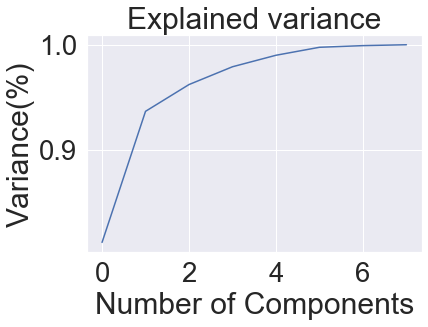

In [84]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel("Variance(%)")
plt.title("Explained variance")
plt.show()

**From this plot i can choose number of componenet 4-5 where my data will cover more than 95%**

In [85]:
pca=PCA(n_components=6)

In [86]:
new_data_pca=pca.fit_transform(x_scaled)

In [87]:
new_data_pca

array([[-1.82082296e+00, -1.13151373e+00,  1.66863531e-01,
         4.12606500e-01, -3.22652376e-01,  6.01302346e-03],
       [-3.43227097e+00, -1.10838742e+00,  1.76202127e-01,
        -1.65848077e-01,  1.05254504e-02, -4.66965549e-03],
       [-4.65048774e-01,  1.30212088e+00, -4.05099224e-01,
         2.30632776e-01, -1.35888669e-01,  4.21408985e-02],
       ...,
       [ 2.23615225e+00, -1.17074217e+00, -4.72268610e-01,
        -5.16448085e-01,  7.42430724e-01,  1.25802382e-01],
       [ 1.68435933e+00,  1.24883520e+00,  2.16168490e-01,
         4.72436637e-01,  4.23071626e-02,  6.94037609e-02],
       [ 4.95650025e+00, -1.26461971e+00,  8.98737752e-01,
        -6.70925543e-02,  1.55513792e-01, -5.56284907e-01]])

# 11 Model Building

## 11.1 Multiple linear Regression

In [276]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


In [277]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=101)

In [278]:
mlr=LinearRegression()

## 11.2 Choosing best random_state

In [279]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
mlr=LinearRegression()
for i in range(0,500):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    mlr.fit(x_train,y_train)
    pred_train=mlr.predict(x_train)
    pred_test=mlr.predict(x_test)
    
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("At random state",i,"Model perfrom well")
        print("At random state",i)
        print("Training R2_score is-",r2_score(y_train,pred_train)*100)
        print("Testing R2_score is-",r2_score(y_test,pred_test)*100)

At random state 7 Model perfrom well
At random state 7
Training R2_score is- 53.570923225999124
Testing R2_score is- 53.619126350348
At random state 10 Model perfrom well
At random state 10
Training R2_score is- 53.67571995785557
Testing R2_score is- 53.74706401802938
At random state 94 Model perfrom well
At random state 94
Training R2_score is- 53.67289663888579
Testing R2_score is- 53.710395017894186
At random state 192 Model perfrom well
At random state 192
Training R2_score is- 53.570954527187986
Testing R2_score is- 53.6323730194883
At random state 254 Model perfrom well
At random state 254
Training R2_score is- 53.746845883896476
Testing R2_score is- 53.69050695652572
At random state 396 Model perfrom well
At random state 396
Training R2_score is- 53.63083433633119
Testing R2_score is- 53.59294487289947
At random state 471 Model perfrom well
At random state 471
Training R2_score is- 53.67760110338238
Testing R2_score is- 53.719508299300145


**Best random state we can choose 94.**

In [280]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=94)

In [281]:
mlr=LinearRegression()

In [282]:
mlr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [283]:
y_pred=mlr.predict(x_test)

## 11.3 performance Metrics Evaluation

In [284]:
y_pred=mlr.predict(x_test)

In [285]:
y_pred

array([-3.65902636, 12.62172924, 12.29388488, ...,  9.21603751,
       10.6046064 , 12.13962401])

In [286]:
r2_score(y_test,y_pred)

0.5371039501789419

In [287]:
MAE=mean_absolute_error(y_test,y_pred)

In [288]:
MAE

1.5954494303519153

In [289]:
MSE=mean_squared_error(y_test,y_pred)

In [290]:
RMSE=np.sqrt(MSE)

In [291]:
RMSE

2.2012881664767256

In [292]:
r2_score(y_test,y_pred)

0.5371039501789419

In [293]:
mlr.score(x_train,y_train)

0.5367289663888579

In [294]:
mlr_score=mlr.score(x_test,y_test)

In [295]:
mlr_score

0.5371039501789419

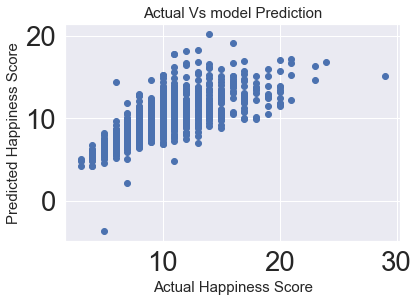

In [296]:
#Below graph represent the actual happiness score vs perdicted happiness score.
plt.scatter(y_test,y_pred)

plt.xlabel("Actual Happiness Score",fontsize=15)
plt.ylabel("Predicted Happiness Score",fontsize=15)
plt.title("Actual Vs model Prediction",fontsize=15)
plt.show()

### 11.4 Regularziation technique

In [297]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

In [298]:
lassocv=LassoCV(alphas=None,max_iter=100000,normalize=True)

In [299]:
lassocv.fit(x_train,y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [300]:
lassocv.score(x_test,y_test)

0.5380190360792568

In [301]:
lassocv.alpha_

3.6881659830418536e-05

In [302]:
alpha=lassocv.alpha_

In [303]:
lasso_reg=Lasso(alpha,max_iter=10000)

In [304]:
lasso_reg.fit(x_train,y_train)

Lasso(alpha=3.6881659830418536e-05, copy_X=True, fit_intercept=True,
      max_iter=10000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [305]:
lasso_reg.score(x_test,y_test)

0.5371240469987664

In [306]:
lasso_reg.coef_

array([ 0.07998469, -0.2570483 ,  1.14297158,  0.94030629,  5.00527791,
       -4.81783407, -1.20740287,  0.95762687])

**we can see almost all features are important here except sex which is 0.079 but i have decided not to drop now will see later with other model accuracy,So decided to go forward with all features**

In [307]:
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridgecv.fit(x_train,y_train)
ridgecv.alpha_

0.001

In [308]:
ridge_model=Ridge(alpha=ridgecv.alpha_)

In [309]:
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [310]:
y_pred=ridge_model.predict(x_test)

In [311]:
ridge_model.score(x_test,y_test)

0.5371048594765347

**Model accuracy has not imporved even in RidgeCV, we will go with other model.**

### 11.5 Cross Validation score on Multiple linear regression

In [312]:
from sklearn.model_selection import cross_val_score

In [313]:
score=cross_val_score(mlr,x_train,y_train,scoring="neg_mean_squared_error",cv=10)

In [314]:
score

array([-4.45106055, -5.27893597, -4.32992387, -4.66246686, -3.94121251,
       -5.172552  , -5.35499939, -5.84837082, -5.25742775, -4.04469633])

In [315]:
abs(score).mean()

4.834164604772242

### 11.6 Choosing Best CV

In [316]:
for j in range(2,15):
    mlr_scores=cross_val_score(mlr,x_scaled,y,cv=j)
    mlr_s=mlr_scores.mean()
    print("At CV:-",j)
    print("Cross validation score is:",mlr_scores*100)
    print("r2 Score:",mlr_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [53.28824419 53.20800339]
r2 Score: 53.248123790462124


At CV:- 3
Cross validation score is: [53.61592996 52.09600347 47.57501646]
r2 Score: 51.09564996001234


At CV:- 4
Cross validation score is: [48.82592236 17.17026294 54.86534361 51.71017091]
r2 Score: 43.14292495436746


At CV:- 5
Cross validation score is: [42.95057067 17.72375207 52.76186814 51.17967713 44.72006424]
r2 Score: 41.867186450042226


At CV:- 6
Cross validation score is: [44.32278578 49.02510703 14.32047683 57.55084652 50.55069237 41.54831947]
r2 Score: 42.8863713337228


At CV:- 7
Cross validation score is: [50.34362397 50.19818292 13.94914964 59.01875918 46.05857933 52.82711217
 42.15883337]
r2 Score: 44.936320082739265


At CV:- 8
Cross validation score is: [54.26262373 44.48822726 31.13878418  8.64271042 55.12096857 18.56963971
 55.51442891 41.69918554]
r2 Score: 38.67957104076122


At CV:- 9
Cross validation score is: [55.42688814 46.12689177 14.09579127 11.31770052 59.7516

**We can choose best CV is 2**

In [317]:
cross_val_score(mlr,x_train,y_train,scoring="neg_mean_squared_error",cv=2)

array([-4.54695951, -5.12222909])

In [318]:
mlr_cv_score=cross_val_score(mlr,x_scaled,y,cv=13).mean()

In [319]:
mlr_score

0.5371039501789419

In [320]:
mlr_cv_score

0.3603614927443371

## 12. Logistic Regresion

In [335]:
from sklearn.linear_model import LogisticRegression

In [336]:
lr=LogisticRegression()

In [337]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [338]:
y_pred=lr.predict(x_test)

In [339]:
lr_score=r2_score(y_test,y_pred)

In [340]:
lr_score

0.3975808056545552

**As we see Logistic Regression without any hyperparameter tuning model perfromance is very poor.**

### 12.1 Cross Validation score on Logistic Regression

In [327]:
from sklearn.model_selection import cross_val_score

In [328]:
score=cross_val_score(lr,x_train,y_train,scoring="neg_mean_squared_error",cv=10)

In [329]:
abs(score).mean()

6.269425873112348

### 12.2 Choosing Best CV

In [334]:
for j in range(2,15):
    lr_scores=cross_val_score(lr,x_scaled,y,cv=j)
    lr_s=lr_scores.mean()
    print("At CV:-",j)
    print("Cross validation score is:",lr_scores*100)
    print("r2 Score:",lr_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [26.71134514 27.25095785]
r2 Score: 26.981151497811013


At CV:- 3
Cross validation score is: [26.34601579 27.87356322 27.87356322]
r2 Score: 27.36438074334453


At CV:- 4
Cross validation score is: [24.68899522 27.77777778 26.24521073 27.39463602]
r2 Score: 26.52665493409595


At CV:- 5
Cross validation score is: [24.0430622  28.8277512  26.82634731 26.34730539 28.74251497]
r2 Score: 26.957396212359967


At CV:- 6
Cross validation score is: [21.09038737 29.31034483 27.5862069  24.71264368 27.29885057 28.87931034]
r2 Score: 26.47962394938351


At CV:- 7
Cross validation score is: [20.43551089 30.65326633 26.9681742  25.96314908 28.97822446 24.4966443
 30.36912752]
r2 Score: 26.837728110029214


At CV:- 8
Cross validation score is: [22.3709369  27.5862069  30.45977011 27.5862069  26.81992337 27.01149425
 26.05363985 27.96934866]
r2 Score: 26.982190867599982


At CV:- 9
Cross validation score is: [21.72043011 27.80172414 28.44827586 27.80172414 27.801

**we can choose CV 3 **

In [341]:
score=cross_val_score(lr,x_train,y_train,scoring="neg_mean_squared_error",cv=3)

In [342]:
lr_cv_score=abs(score).mean()

In [343]:
lr_cv_score

6.4156966601730465

In [344]:
lr_score

0.3975808056545552

## 13. Random Forest Regressor

In [345]:
from sklearn.ensemble import RandomForestRegressor

In [346]:
rfr=RandomForestRegressor()

In [347]:
rfr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [348]:
y_pred=rfr.predict(x_test)

In [349]:
r2_score(y_test,y_pred)

0.5423283116668209

**Random Forest Regressor is givng better performance compare to logistic Regression.**

### 13.1 Cross Validation score on Random Forest Regressior

In [350]:
score=cross_val_score(rfr,x_train,y_train,scoring="neg_mean_squared_error",cv=10)

In [351]:
abs(score).mean()

4.798277208845668

### 13.2 Choosing Best CV

In [353]:
for j in range(2,15):
    rfr_scores=cross_val_score(rfr,x_scaled,y,cv=j)
    rfr_s=rfr_scores.mean()
    print("At CV:-",j)
    print("Cross validation score is:",rfr_scores*100)
    print("r2 Score:",rfr_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [53.60787531 52.49361699]
r2 Score: 53.050746150628456


At CV:- 3
Cross validation score is: [54.05951845 52.26124494 47.71779699]
r2 Score: 51.34618679036089


At CV:- 4
Cross validation score is: [49.57832396 24.25565142 55.64853562 49.39307284]
r2 Score: 44.71889596133695


At CV:- 5
Cross validation score is: [45.04105919 23.86088461 51.92617504 53.57639829 45.3619122 ]
r2 Score: 43.953285865604194


At CV:- 6
Cross validation score is: [41.81006664 57.57305364 17.66004153 57.6944251  52.47897561 42.18725729]
r2 Score: 44.90063663540771


At CV:- 7
Cross validation score is: [43.56770543 57.16541915 17.45816894 55.60225729 55.50997558 53.30024818
 41.7190794 ]
r2 Score: 46.33183628327415


At CV:- 8
Cross validation score is: [45.85347864 50.01933674 43.78815535  8.72670783 53.80296179 35.96276453
 55.33924346 40.92172018]
r2 Score: 41.80179606566924


At CV:- 9
Cross validation score is: [49.39202363 50.06948292 30.05350947 17.17877951 56.2254

KeyboardInterrupt: 

**We can choose best cv=2**

In [384]:
score=cross_val_score(rfr,x_train,y_train,scoring="neg_mean_squared_error",cv=2)

In [385]:
rfr_cv_score=abs(score).mean()

In [386]:
rfr_cv_score

4.824479565839038

In [387]:
rfr_score=r2_score(y_test,y_pred)

In [388]:
rfr_score

0.5438704567498989

## 14. AdaBoostRegressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [152]:
adar=AdaBoostRegressor()

In [153]:
adar.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [154]:
y_pred=adar.predict(x_test)

In [155]:
r2_score(y_test,y_pred)

0.26397607195569983

In [164]:
adar_score=r2_score(y_test,y_pred)

### 14.1 Cross Validation score on AdaBoostRegressor

In [157]:
score=cross_val_score(adar,x_train,y_train,scoring="neg_mean_squared_error",cv=10)

In [158]:
abs(score).mean()

7.5043975387289334

### 14.2 Choosing Best CV

In [159]:
for j in range(2,15):
    adar_score=cross_val_score(adar,x_scaled,y,cv=j)
    adar_s=adar_score.mean()
    print("At CV:-",j)
    print("Cross validation score is:",adar_score*100)
    print("R2 Score:",adar_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [25.77055137 20.83109106]
R2 Score: 23.30082121617984


At CV:- 3
Cross validation score is: [45.48772277  8.62737934 -4.10954588]
R2 Score: 16.668518743475737


At CV:- 4
Cross validation score is: [  46.12907934 -158.88563307   25.38953046   14.78337681]
R2 Score: -18.14591161478292


At CV:- 5
Cross validation score is: [  51.87496918 -205.47665512   34.32363188  -12.90882061   -8.84451479]
R2 Score: -28.206277893731812


At CV:- 6
Cross validation score is: [  51.37486289  -24.03438113 -110.38649813   42.02543079   31.68378474
  -48.01158254]
R2 Score: -9.558063897811257


At CV:- 7
Cross validation score is: [  50.70573557   16.90011441 -170.45978873   38.02831968  -12.53497313
   33.48768975  -44.11345402]
R2 Score: -12.569479496228425


At CV:- 8
Cross validation score is: [  51.13246726   34.38524155 -138.00966565 -215.26427374   49.82862261
 -134.72034525   37.83026037  -36.23586015]
R2 Score: -43.88169412439294


At CV:- 9
Cross validation

**We can choose best cv=2**

In [354]:
score=cross_val_score(adar,x_train,y_train,scoring="neg_mean_squared_error",cv=2)

In [355]:
adar_cv_score=(abs(score).mean())

In [356]:
adar_cv_score

7.235917236358225

In [357]:
adar_score

0.26397607195569983

## 15. GRADIEN BOOSTING

In [358]:
from sklearn.ensemble import GradientBoostingRegressor

In [359]:
gbr=GradientBoostingRegressor()

In [360]:
gbr.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [361]:
y_pred=gbr.predict(x_test)

In [362]:
gbr_score=r2_score(y_test,y_pred)

**Gradient boosting is givng better performance compare to Random Forest Regression.**

### 15.1 Cross Validation score on GradientBoostingRegressor

In [363]:
score=cross_val_score(gbr,x_train,y_train,scoring="neg_mean_squared_error",cv=10)

In [364]:
abs(score).mean()

4.702022137610873

### 15.2 Choosing Best CV

In [365]:
for j in range(2,15):
    gbr_scores=cross_val_score(gbr,x_scaled,y,cv=j)
    gbr_s=gbr_scores.mean()
    print("At CV:-",j)
    print("Cross validation score is:",gbr_scores*100)
    print("r2 Score:",gbr_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [52.8882268  54.09177643]
r2 Score: 53.49000161299393


At CV:- 3
Cross validation score is: [53.32799363 55.03137337 49.77914918]
r2 Score: 52.71283872545399


At CV:- 4
Cross validation score is: [48.75303604 28.86981463 57.51706416 52.20629644]
r2 Score: 46.83655281925326


At CV:- 5
Cross validation score is: [42.38902895 28.78605098 53.52774115 55.87117084 48.65414268]
r2 Score: 45.845626919982095


At CV:- 6
Cross validation score is: [40.31414632 57.28368409 24.0442487  58.36870886 53.20903156 45.42987096]
r2 Score: 46.441615080748946


At CV:- 7
Cross validation score is: [44.2034563  53.48630695 25.73699555 57.26124363 55.06690795 54.20585196
 43.83755344]
r2 Score: 47.68547368393471


At CV:- 8
Cross validation score is: [46.91790712 46.24722628 47.46514471 16.76782566 54.61208143 44.44052628
 55.57606794 41.19645198]
r2 Score: 44.15290392582047


At CV:- 9
Cross validation score is: [50.56862946 46.47962706 35.1435159  21.2031188  60.3710

**We can choose best CV 2.**

In [366]:
score=cross_val_score(gbr,x_train,y_train,scoring="neg_mean_squared_error",cv=2)

In [367]:
gbr_cv_score=abs(score).mean()

In [368]:
gbr_cv_score

4.776166379669397

In [369]:
gbr_score

0.5445352295382748

# 16.Support Vector Regression

In [370]:
from sklearn import svm

In [371]:
svr=svm.SVR()

In [372]:
svr.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [373]:
y_pred=svr.predict(x_test)

In [374]:
svr_score=r2_score(y_test,y_pred)

In [375]:
svr_score

0.5438704567498989

### 16.1 Cross Validation score on Support Vector Regression

In [376]:
score=cross_val_score(gbr,x_train,y_train,scoring="neg_mean_squared_error",cv=10)

In [377]:
abs(score).mean()

4.710636248408877

### 16.2 Choosing Best CV

In [378]:
for j in range(2,15):
    svr_scores=cross_val_score(svr,x_scaled,y,cv=j)
    svr_s=svr_scores.mean()
    print("At CV:-",j)
    print("Cross validation score is:",svr_scores*100)
    print("r2 Score:",svr_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [52.85478002 53.3957756 ]
r2 Score: 53.12527780820694


At CV:- 3
Cross validation score is: [48.46017657 56.08333256 54.13222685]
r2 Score: 52.89191199339107


At CV:- 4
Cross validation score is: [41.46814444 48.13049932 55.97708026 53.90389482]
r2 Score: 49.86990471106838


At CV:- 5
Cross validation score is: [33.4960537  49.35399008 50.11910261 58.28855342 54.69220934]
r2 Score: 49.18998182999298


At CV:- 6
Cross validation score is: [33.34585926 60.04947569 44.16744649 53.87655813 52.13082053 54.73047656]
r2 Score: 49.71677277513773


At CV:- 7
Cross validation score is: [37.2589823  53.202461   45.05378692 53.56300747 58.82150069 52.93776778
 53.68185419]
r2 Score: 50.64562290647719


At CV:- 8
Cross validation score is: [40.81389163 43.2262633  62.19466831 34.4163224  48.85880545 55.06333012
 53.46420929 52.26735263]
r2 Score: 48.78810539131466


At CV:- 9
Cross validation score is: [44.68487201 40.32801688 45.47001652 42.60774882 56.823625

**We can choose best CV 2.**

In [379]:
score=cross_val_score(svr,x_train,y_train,scoring="neg_mean_squared_error",cv=2)

In [380]:
svr_cv_score=abs(score).mean()

In [381]:
svr_cv_score

4.969985282183941

In [382]:
svr_score

0.5438704567498989

**As we can see Random Forest Regression is giving better score and cross validation score with minimum difference compare to other model.**

# 17. Hyperparameter Tuning with Random Forest Regression

In [233]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [234]:
rfr=RandomForestRegressor()

In [235]:
params={'n_estimators':[10,20,25,30],
       'criterion':['mse',"mae"],
       'max_depth':[10,12,15],
        'min_samples_split':[10,15,18],
        'min_samples_leaf':[5,6,8,10],
        "bootstrap":[True,False],
       }

In [239]:
grd=GridSearchCV(rfr,param_grid=params)

In [240]:
grd.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [404]:
grd.best_params_

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 10,
 'min_samples_leaf': 6,
 'min_samples_split': 18,
 'n_estimators': 20}

In [405]:
rfr=grd.best_estimator_

In [406]:
rfr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=6,
                      min_samples_split=18, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [407]:
y_pred=rfr.predict(x_test)

In [408]:
rfr_score=r2_score(y_test,y_pred)

In [409]:
rfr_score

0.5489661959695527

# 18. Cross validation score for Random forest

In [410]:
score=cross_val_score(rfr,x_train,y_train,scoring="neg_mean_squared_error",cv=2)

In [411]:
rfr_cv_score=abs(score).mean()

In [412]:
rfr_cv_score

4.775915885580691

# 19.Lets choose the best model using Cross validation comparism

In [413]:
Multiplelinear_Regression={"R2 Score":round(mlr_score,2),
                    "CV Score":round(mlr_cv_score,2),
                    "Difference":mlr_score-mlr_cv_score}
Logistic_Regression={"R2 Score":round(lr_score,2),
                    "CV Score":round(lr_cv_score,2),
                    "Difference":lr_score-lr_cv_score}
Random_Forest={"R2 Score":round(rfr_score,2),
                    "CV Score":round(rfr_cv_score,2),
                    "Difference":rfr_score-rfr_cv_score}
AdaBooster_Regressor={"R2 Score":round(adar_score,2),
                    "CV Score":round(adar_cv_score,2),
                    "Difference":adar_score-adar_cv_score}
GradienBoosting_Regressor={"R2 Score":round(gbr_score,2),
                    "CV Score":round(gbr_cv_score,2),
                    "Difference":gbr_score-gbr_cv_score}
SupportVector_Regressor={"R2 Score":round(svr_score,2),
                    "CV Score":round(svr_cv_score,2),
                    "Difference":svr_score-svr_cv_score}


In [414]:
data=np.array([[mlr_score,mlr_cv_score,mlr_score-mlr_cv_score],[lr_score,lr_cv_score,lr_score-lr_cv_score],[rfr_score,rfr_cv_score,rfr_score-rfr_cv_score],[adar_score,adar_cv_score,adar_score-adar_cv_score],[gbr_score,gbr_cv_score,gbr_score-gbr_cv_score],[svr_score,svr_cv_score,svr_score-svr_cv_score]])

In [415]:
index_value=["MultiLinear Regression","Logistic Regression","RandomForest Regression","AdaBooster Regressor","GradientBoosting Regressor","SupportVector Regressor"]

In [416]:
columns_value=["r2 Score","Cross Validation Score","Difference"]

In [417]:
model_selection=pd.DataFrame(data=data,
                            index=index_value,
                            columns=columns_value)

In [418]:
model_selection

,r2 Score,Cross Validation Score,Difference
MultiLinear Regression,0.537104,0.360361,0.176742
Logistic Regression,0.397581,6.415697,-6.018116
RandomForest Regression,0.548966,4.775916,-4.226950
AdaBooster Regressor,0.263976,7.235917,-6.971941
GradientBoosting Regressor,0.544535,4.776166,-4.231631
SupportVector Regressor,0.543870,4.969985,-4.426115


# 20. Predict age of Abalone

In [426]:
y_pred=rfr.predict(x_test)

In [435]:
age={"Age (in yrs)":y_pred+1.5}

In [436]:
age=pd.DataFrame(age)

In [437]:
age

,Age (in yrs)
0,7.462455
1,15.245226
2,13.764337
3,10.460486
4,10.893169
...,...
1249,13.321563
1250,16.155549
1251,10.197179
1252,10.672117


# 21.Saving model

In [438]:
import pickle

In [439]:
filename="abalone_age_predict.pkl"

In [440]:
pickle.dump(rfr,open(filename,"wb"))